# Data Project Stock Price Analysis

The Questions that are examed.

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4_a.) What was the correlation between different stocks' closing prices?
    4_b.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?
    

In [1]:
# pandas and numpy forcaluclations and formating data 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualzation matplot lib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # to redues fomating each time used
%matplotlib inline 
# to print in notebook

# For reading stock data from yahoo
from pandas_datareader import data 

# For time stamps
import datetime as dt

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = dt.date.today()
start = dt.date(end.year-1,end.month,end.day)

In [3]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'google',start,end)

globals()[stock] => made each company its own dataframe 
so I onlyneed to type AAPL to get a dataframe for Apple stock

In [4]:
MSFT.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-27,56.93,58.06,56.68,57.95,28065071
2016-09-28,57.88,58.06,57.67,58.03,20536400
2016-09-29,57.81,58.17,57.21,57.40,25463536
2016-09-30,57.57,57.77,57.34,57.60,29910788
2016-10-03,57.40,57.55,57.06,57.42,19189515


In [5]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,136.331873,137.228486,135.431355,136.412789,2.871669e+07
std,17.532721,17.554618,17.297635,17.387292,1.195041e+07
min,106.570000,107.680000,104.080000,105.710000,1.147592e+07
25%,117.175000,117.820000,116.585000,117.190000,2.125827e+07
50%,141.410000,142.000000,140.450000,141.200000,2.600972e+07
75%,151.385000,152.885000,149.805000,150.790000,3.255070e+07
max,164.800000,164.940000,163.630000,164.050000,1.119850e+08


note that yahoo inclueded the Adj Close to help with historical data if there was a split or something but google does not. 

The titorial i am fllowingwill use it and i will coment when it does and what i chose to do insted. 

In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-09-27 to 2017-09-25
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


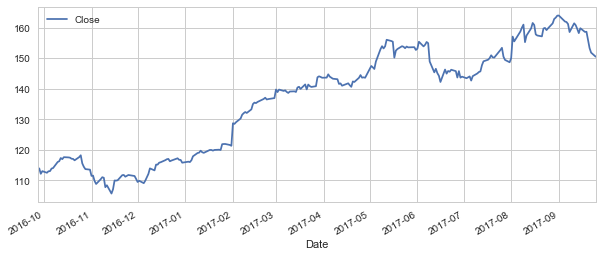

In [7]:
# in tatorial this is Adj Close
AAPL['Close'].plot(legend=True,figsize=(10,4))

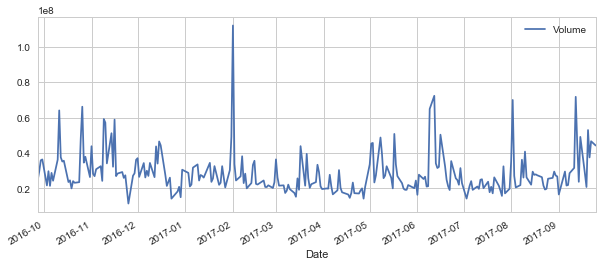

In [8]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [22]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'],ma) # he used Adj Close

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


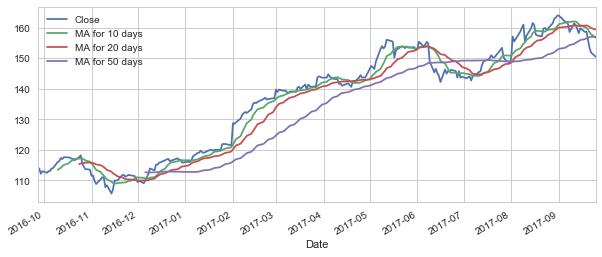

In [23]:
AAPL[['Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

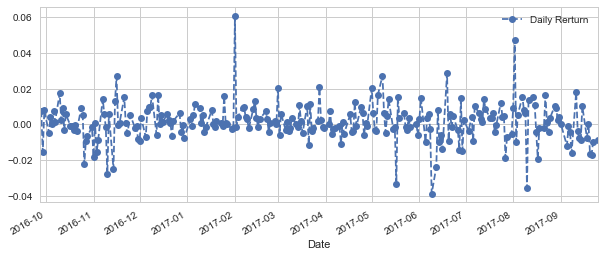

In [29]:
# Dayly return 
AAPL['Daily Rerturn'] = AAPL['Close'].pct_change()
AAPL['Daily Rerturn'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

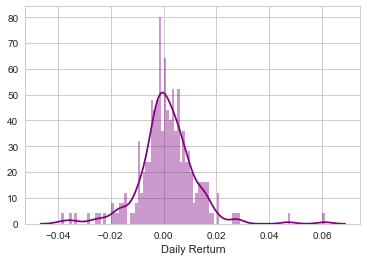

In [37]:
sns.distplot(AAPL['Daily Rerturn'].dropna(),bins=100,color='purple')

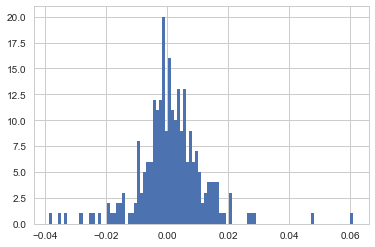

In [39]:
# or 
AAPL['Daily Rerturn'].hist(bins=100)

In [40]:
closing_df = data.DataReader(tech_list,'google',start,end)['Close']

In [41]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-09-27,113.09,816.11,783.01,57.95
2016-09-28,113.95,828.72,781.56,58.03
2016-09-29,112.18,829.05,775.01,57.40
2016-09-30,113.05,837.31,777.29,57.60
2016-10-03,112.52,836.74,772.56,57.42


In [43]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-09-27,NaN,NaN,NaN,NaN
2016-09-28,0.007605,0.015451,-0.001852,0.001381
2016-09-29,-0.015533,0.000398,-0.008381,-0.010856
2016-09-30,0.007755,0.009963,0.002942,0.003484
2016-10-03,-0.004688,-0.000681,-0.006085,-0.003125


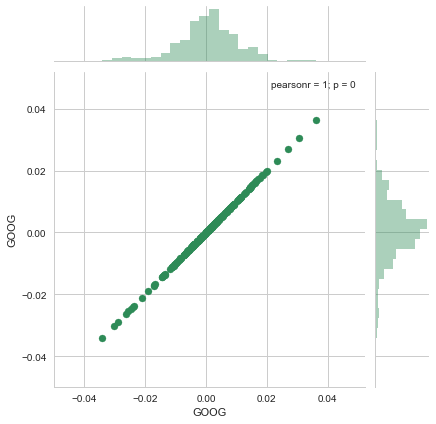

In [44]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

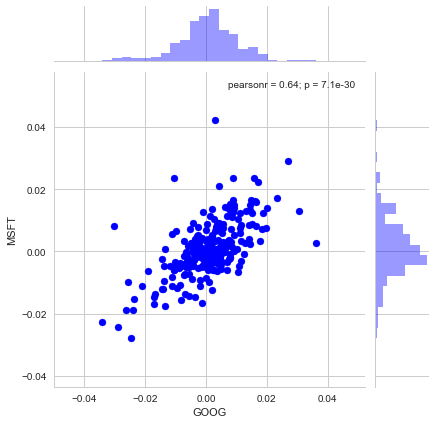

In [46]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter',color='b')

In [47]:
url = 'http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient'

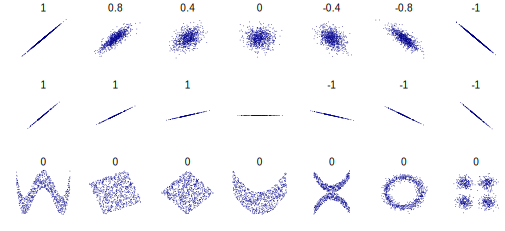

In [48]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

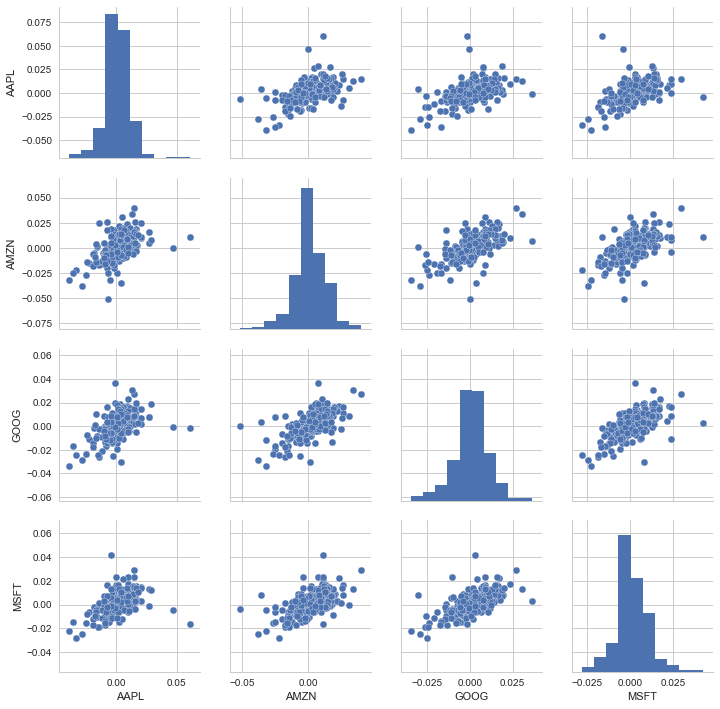

In [49]:
sns.pairplot(tech_rets.dropna())

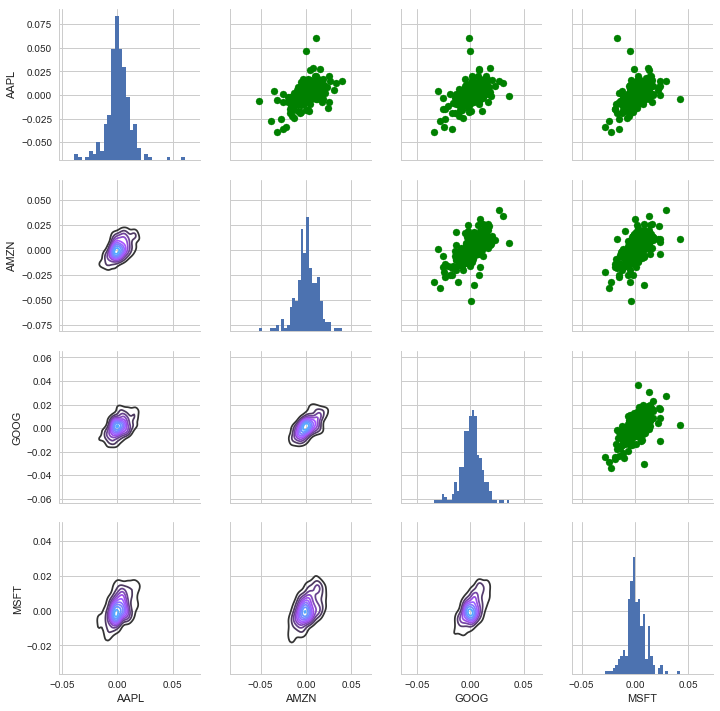

In [50]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='g')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

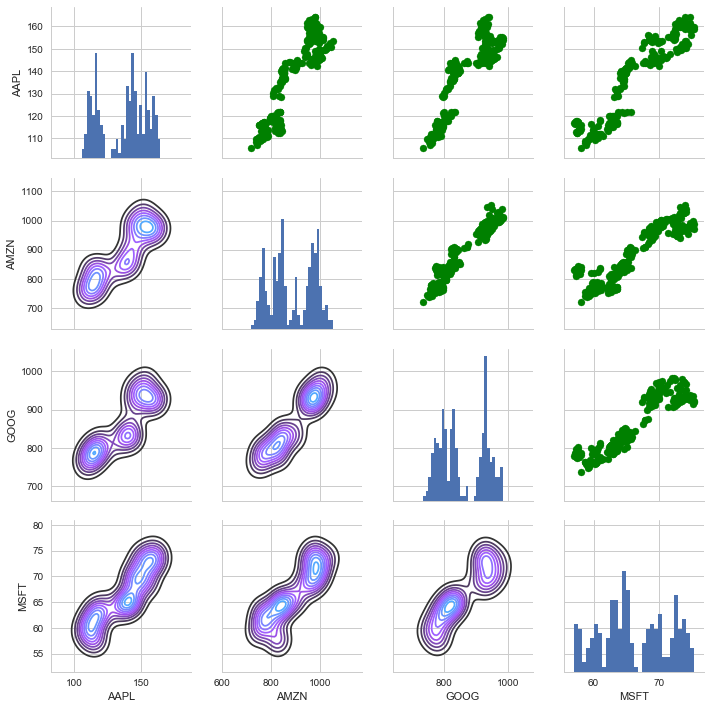

In [52]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='g')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

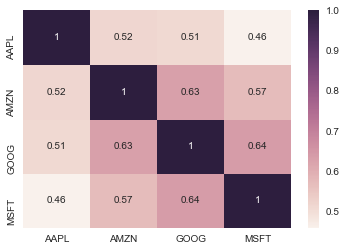

In [57]:
corr = tech_rets.dropna().corr()
sns.heatmap(corr,annot=True)

          AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.516835  0.510754  0.458112
AMZN  0.516835  1.000000  0.629973  0.571739
GOOG  0.510754  0.629973  1.000000  0.637159
MSFT  0.458112  0.571739  0.637159  1.000000


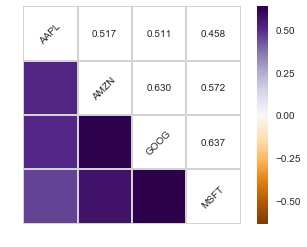

In [58]:
# to get the same plot as in the video
# Generate a random dataset
### I used existing data set 
#cols = [s*4 for s in list("ABCD")]
#df = pd.DataFrame(data=np.random.rayleigh(scale=5, size=(100, 4)), columns=cols)

# Compute the correlation matrix
### I used corr from preveus cell
#corr = df.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

          AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.906044  0.896555  0.922358
AMZN  0.906044  1.000000  0.960921  0.893846
GOOG  0.896555  0.960921  1.000000  0.918637
MSFT  0.922358  0.893846  0.918637  1.000000


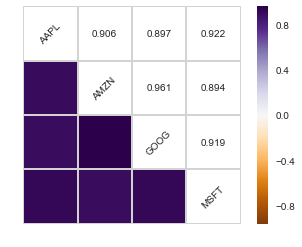

In [59]:
corr = closing_df.corr()

print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

In [72]:
# Analysis risk
rets = tech_rets.dropna()

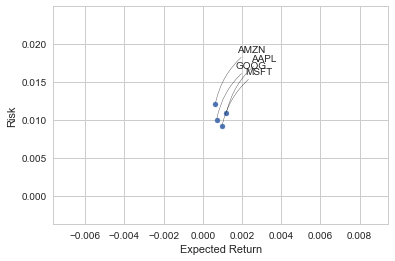

In [71]:
area = np.pi*8

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle= 'arc3,rad=0.2'))

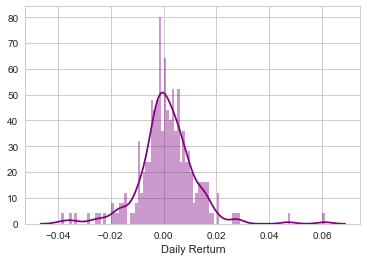

In [74]:
# Value at Risk
sns.distplot(AAPL['Daily Rerturn'].dropna(),bins=100,color='purple')

In [75]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-09-28,0.007605,0.015451,-0.001852,0.001381
2016-09-29,-0.015533,0.000398,-0.008381,-0.010856
2016-09-30,0.007755,0.009963,0.002942,0.003484
2016-10-03,-0.004688,-0.000681,-0.006085,-0.003125
2016-10-04,0.004266,-0.003239,0.005009,-0.003135


In [77]:
rets['AAPL'].quantile(0.05)

-0.016067396519636123

In [81]:
# use monte carlo method
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [79]:
'''     Browninan motion 
    deta(S)/S = mu*detat(t) + sigma*epsalon*sqrt(delta(t))
    deta(S) = S*(mu*detat(t) + sigma*epsalon*sqrt(delta(t)))'''

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        # epsalone is np.random.normal
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [80]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-27,775.50,785.99,774.31,783.01,1153247
2016-09-28,777.85,781.81,774.97,781.56,1109834
2016-09-29,781.44,785.80,774.23,775.01,1314746
2016-09-30,776.33,780.94,774.09,777.29,1585333
2016-10-03,774.25,776.06,769.50,772.56,1278821


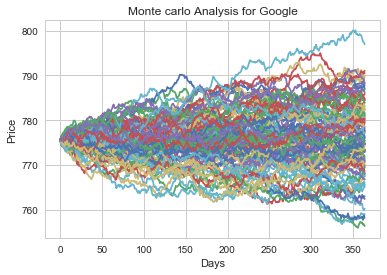

In [82]:
# start at open for first day 
start_price = 775.50

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis for Google')

In [83]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]

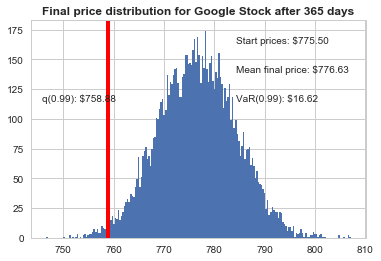

In [86]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

# Start price
plt.figtext(0.6,0.8, s = "Start prices: $%.2f" % start_price)
# mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulation.mean())
# Varianc of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))
# Disply 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4,color='r')
# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

In [ ]:
# Estmate the values at rick for not tech stocks 

# Build a practic portfolio and see how well it works

# Look further into correlation of two stocks and see 
#  if that gives you any insight into future possible stock pricess.